## Análise de dados com Pandas: Data Wrangling, Merge de DataFrame e GroupBy

### Victor Hugo Negrisoli - Desenvolvedor de Software Full-Stack & Analista de Dados

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [7]:
# Gerar dados

cadastro_a = {
    'id': [1, 2, 3, 4, 5],
    'nome':['Victor Hugo', 'Natália', 'Eric', 'Rafael', 'Denner'],
    'idade': [22, 23, 21, 22, 22],
    'cep': ['86046-222', '86088-513', '86044-321', '86150-233', '86055-832']
}

cadastro_b = {
    'id': [6, 7, 8, 9, 10],
    'nome':['José', 'Marcelo', 'Rodrigo', 'Rafaela', 'Sonia'],
    'idade': [26, 19, 25, 23, 29],
    'cep': ['56314-545', '79044-460', '57302-030', '69312-212', '57312-530']
}

cadastro_c = {
    'id': [1, 1, 2, 2, 2, 3, 4, 5, 6, 6, 8],
    'data':['2020-01-01', '2020-01-20', '2020-01-15', '2020-01-16', '2020-01-05', 
            '2020-01-03', '2020-01-03', '2020-01-02', '2020-01-01', '2020-01-06', '2020-01-01', ],
    'valor': [200, 50, 500, 562, 1480, 55, 3020, 41, 123, 123, 25]
}

In [8]:
df_cadastro_a = pd.DataFrame(cadastro_a, columns = ['id', 'nome', 'idade', 'cep'])
df_cadastro_a

,id,nome,idade,cep
0,1,Victor Hugo,22,86046-222
1,2,Natália,23,86088-513
2,3,Eric,21,86044-321
3,4,Rafael,22,86150-233
4,5,Denner,22,86055-832


In [9]:
df_cadastro_b = pd.DataFrame(cadastro_b, columns = ['id', 'nome', 'idade', 'cep'])
df_cadastro_b

,id,nome,idade,cep
0,6,José,26,56314-545
1,7,Marcelo,19,79044-460
2,8,Rodrigo,25,57302-030
3,9,Rafaela,23,69312-212
4,10,Sonia,29,57312-530


In [10]:
df_cadastro_c = pd.DataFrame(cadastro_c, columns = ['id', 'data', 'valor'])
df_cadastro_c

,id,data,valor
0,1,2020-01-01,200
1,1,2020-01-20,50
2,2,2020-01-15,500
3,2,2020-01-16,562
4,2,2020-01-05,1480
5,3,2020-01-03,55
6,4,2020-01-03,3020
7,5,2020-01-02,41
8,6,2020-01-01,123
9,6,2020-01-06,123


In [11]:
# Concatenando os DataFrames df_cadastro_a e df_cadastro_b

dados = pd.concat([df_cadastro_a, df_cadastro_b], ignore_index = True)
dados

,id,nome,idade,cep
0,1,Victor Hugo,22,86046-222
1,2,Natália,23,86088-513
2,3,Eric,21,86044-321
3,4,Rafael,22,86150-233
4,5,Denner,22,86055-832
5,6,José,26,56314-545
6,7,Marcelo,19,79044-460
7,8,Rodrigo,25,57302-030
8,9,Rafaela,23,69312-212
9,10,Sonia,29,57312-530


#### Utilizando a função Merge para realizar a junção entre os DataFrames como Left, Right, Inner, Outer e Full

#### Left

In [12]:
left = pd.merge(dados, df_cadastro_c, on = 'id', how = 'left')
left

,id,nome,idade,cep,data,valor
0,1,Victor Hugo,22,86046-222,2020-01-01,200.0
1,1,Victor Hugo,22,86046-222,2020-01-20,50.0
2,2,Natália,23,86088-513,2020-01-15,500.0
3,2,Natália,23,86088-513,2020-01-16,562.0
4,2,Natália,23,86088-513,2020-01-05,1480.0
5,3,Eric,21,86044-321,2020-01-03,55.0
6,4,Rafael,22,86150-233,2020-01-03,3020.0
7,5,Denner,22,86055-832,2020-01-02,41.0
8,6,José,26,56314-545,2020-01-01,123.0
9,6,José,26,56314-545,2020-01-06,123.0


#### Right

In [13]:
right = pd.merge(dados, df_cadastro_c, on = 'id', how = 'right')
right

,id,nome,idade,cep,data,valor
0,1,Victor Hugo,22,86046-222,2020-01-01,200
1,1,Victor Hugo,22,86046-222,2020-01-20,50
2,2,Natália,23,86088-513,2020-01-15,500
3,2,Natália,23,86088-513,2020-01-16,562
4,2,Natália,23,86088-513,2020-01-05,1480
5,3,Eric,21,86044-321,2020-01-03,55
6,4,Rafael,22,86150-233,2020-01-03,3020
7,5,Denner,22,86055-832,2020-01-02,41
8,6,José,26,56314-545,2020-01-01,123
9,6,José,26,56314-545,2020-01-06,123


#### Inner

In [14]:
inner = pd.merge(dados, df_cadastro_c, on = 'id', how = 'inner')
inner

,id,nome,idade,cep,data,valor
0,1,Victor Hugo,22,86046-222,2020-01-01,200
1,1,Victor Hugo,22,86046-222,2020-01-20,50
2,2,Natália,23,86088-513,2020-01-15,500
3,2,Natália,23,86088-513,2020-01-16,562
4,2,Natália,23,86088-513,2020-01-05,1480
5,3,Eric,21,86044-321,2020-01-03,55
6,4,Rafael,22,86150-233,2020-01-03,3020
7,5,Denner,22,86055-832,2020-01-02,41
8,6,José,26,56314-545,2020-01-01,123
9,6,José,26,56314-545,2020-01-06,123


#### Outer

In [15]:
outer = pd.merge(dados, df_cadastro_c, on = 'id', how = 'outer')
outer

,id,nome,idade,cep,data,valor
0,1,Victor Hugo,22,86046-222,2020-01-01,200.0
1,1,Victor Hugo,22,86046-222,2020-01-20,50.0
2,2,Natália,23,86088-513,2020-01-15,500.0
3,2,Natália,23,86088-513,2020-01-16,562.0
4,2,Natália,23,86088-513,2020-01-05,1480.0
5,3,Eric,21,86044-321,2020-01-03,55.0
6,4,Rafael,22,86150-233,2020-01-03,3020.0
7,5,Denner,22,86055-832,2020-01-02,41.0
8,6,José,26,56314-545,2020-01-01,123.0
9,6,José,26,56314-545,2020-01-06,123.0


In [16]:
left_group = left.groupby(['nome']).sum()
left_group

,id,idade,valor
nome,,,
Denner,5,22,41.0
Eric,3,21,55.0
José,12,52,246.0
Marcelo,7,19,0.0
Natália,6,69,2542.0
Rafael,4,22,3020.0
Rafaela,9,23,0.0
Rodrigo,8,25,25.0
Sonia,10,29,0.0


In [17]:
# Recuperando o top 5 de vendas

top_5_left = left_group.sort_values(by = 'valor', ascending = False).head()
top_5_left

,id,idade,valor
nome,,,
Rafael,4,22,3020.0
Natália,6,69,2542.0
Victor Hugo,2,44,250.0
José,12,52,246.0
Eric,3,21,55.0


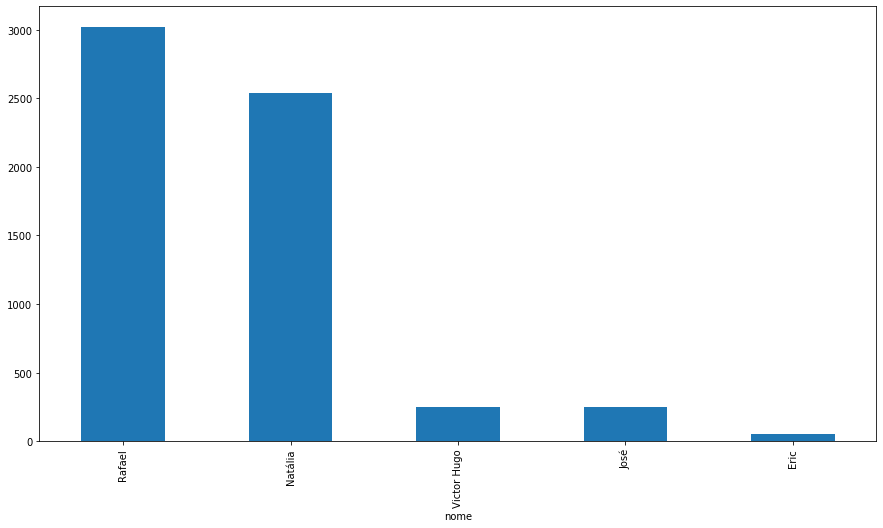

In [18]:
# Plotando os valores

top_5_left['valor'].plot(kind = 'bar', figsize = (15, 8))

#### Trabalhando com multi index no Pandas - múltipla indexação a um DataFrame

In [19]:
arrays = [[1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E']]

multiindex = pd.MultiIndex.from_arrays(arrays, names = ('Números', 'Letras'))
multiindex

MultiIndex([(1, 'A'),
            (2, 'B'),
            (3, 'C'),
            (4, 'D'),
            (5, 'E')],
           names=['Números', 'Letras'])

In [20]:
multiindex.codes

FrozenList([[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]])